In [2]:
import cv2
import numpy as np

def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28))
    normalized = resized / 255.0
    reshaped = normalized.reshape(1, 28, 28, 1)
    return reshaped


In [3]:
#unit testing
import unittest

class TestPreprocessing(unittest.TestCase):
    def test_resize_and_normalize(self):
        img = np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8)  # Random image
        result = preprocess_image(img)
        
        # Check shape
        self.assertEqual(result.shape, (1, 28, 28, 1))
        
        # Check normalization range
        self.assertTrue(np.max(result) <= 1.0)
        self.assertTrue(np.min(result) >= 0.0)

# Run the test
unittest.main(argv=[''], verbosity=2, exit=False)


test_resize_and_normalize (__main__.TestPreprocessing.test_resize_and_normalize) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.012s

OK


In [ ]:

# integrationtesting
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found or unreadable: {image_path}")
    image = cv2.resize(image, (28, 28))
    image = image / 255.0
    image = image.reshape(1, 28, 28, 1)
    return image


In [11]:
import os
import cv2
import numpy as np

# Create folder if it doesn't exist
save_path = "C:/handwritten_digit_recognition/images"
os.makedirs(save_path, exist_ok=True)

# Create a dummy image (28x28) with a digit-like shape
dummy_digit = np.zeros((28, 28), dtype=np.uint8)
cv2.putText(dummy_digit, '5', (5, 23), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255), 2, cv2.LINE_AA)

# Save the image
image_path = os.path.join(save_path, "0_digit.png")
cv2.imwrite(image_path, dummy_digit)

print(f"Dummy digit saved at: {image_path}")


Dummy digit saved at: C:/handwritten_digit_recognition/images\0_digit.png


In [12]:
import unittest
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Your preprocess function
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    image = cv2.resize(image, (28, 28))
    image = image / 255.0
    image = image.reshape(1, 28, 28, 1)
    return image

class TestIntegration(unittest.TestCase):
    def test_preprocess_and_predict(self):
        model = load_model("model.keras")  # Make sure this file exists
        image_path = "C:/handwritten_digit_recognition/images/0_digit.png"
        processed = preprocess_image(image_path)
        prediction = model.predict(processed)
        predicted_digit = np.argmax(prediction)
        print("Predicted digit:", predicted_digit)
        self.assertIsInstance(predicted_digit, int)

# Run tests
unittest.main(argv=[''], verbosity=2, exit=False)


test_preprocess_and_predict (__main__.TestIntegration.test_preprocess_and_predict) ... 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


FAIL
test_resize_and_normalize (__main__.TestPreprocessing.test_resize_and_normalize) ... ERROR

ERROR: test_resize_and_normalize (__main__.TestPreprocessing.test_resize_and_normalize)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\MUBEEN\AppData\Local\Temp\ipykernel_22464\1772065798.py", line 7, in test_resize_and_normalize
    result = preprocess_image(img)
             ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MUBEEN\AppData\Local\Temp\ipykernel_22464\2336163465.py", line 8, in preprocess_image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
cv2.error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'imread'
> Overload resolution failed:
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object


FAIL: test_preprocess_and_pred

Predicted digit: 5


In [15]:
def resize_and_normalize(image):
    image = cv2.resize(image, (28, 28))
    image = image.astype("float32") / 255.0
    image = np.reshape(image, (1, 28, 28, 1))
    return image

def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    return resize_and_normalize(image)


In [16]:
import unittest
import numpy as np

class TestPreprocessing(unittest.TestCase):
    def test_resize_and_normalize(self):
        dummy_image = np.ones((100, 100), dtype=np.uint8) * 255  # white image
        result = resize_and_normalize(dummy_image)
        self.assertEqual(result.shape, (1, 28, 28, 1))
        self.assertTrue((result >= 0).all() and (result <= 1).all())

unittest.main(argv=[''], verbosity=2, exit=False)


test_preprocess_and_predict (__main__.TestIntegration.test_preprocess_and_predict) ... 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


ok
test_resize_and_normalize (__main__.TestPreprocessing.test_resize_and_normalize) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.431s

OK


Predicted digit: 5


In [18]:
import unittest
from keras.models import load_model

class TestIntegration(unittest.TestCase):
    def test_preprocess_and_predict(self):
        model = load_model("model.keras")  # Ensure this file exists
        image = load_and_preprocess_image("C:/handwritten_digit_recognition/images/0_digit.png")
        prediction = model.predict(image)
        predicted_digit = prediction.argmax()
        print(f"Predicted digit: {predicted_digit}")
        self.assertIsInstance(predicted_digit, int)

unittest.main(argv=[''], verbosity=2, exit=False)


test_preprocess_and_predict (__main__.TestIntegration.test_preprocess_and_predict) ... 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


FAIL
test_resize_and_normalize (__main__.TestPreprocessing.test_resize_and_normalize) ... ok

FAIL: test_preprocess_and_predict (__main__.TestIntegration.test_preprocess_and_predict)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\MUBEEN\AppData\Local\Temp\ipykernel_22464\931546339.py", line 11, in test_preprocess_and_predict
    self.assertIsInstance(predicted_digit, int)
AssertionError: 5 is not an instance of <class 'int'>

----------------------------------------------------------------------
Ran 2 tests in 0.418s

FAILED (failures=1)


Predicted digit: 5


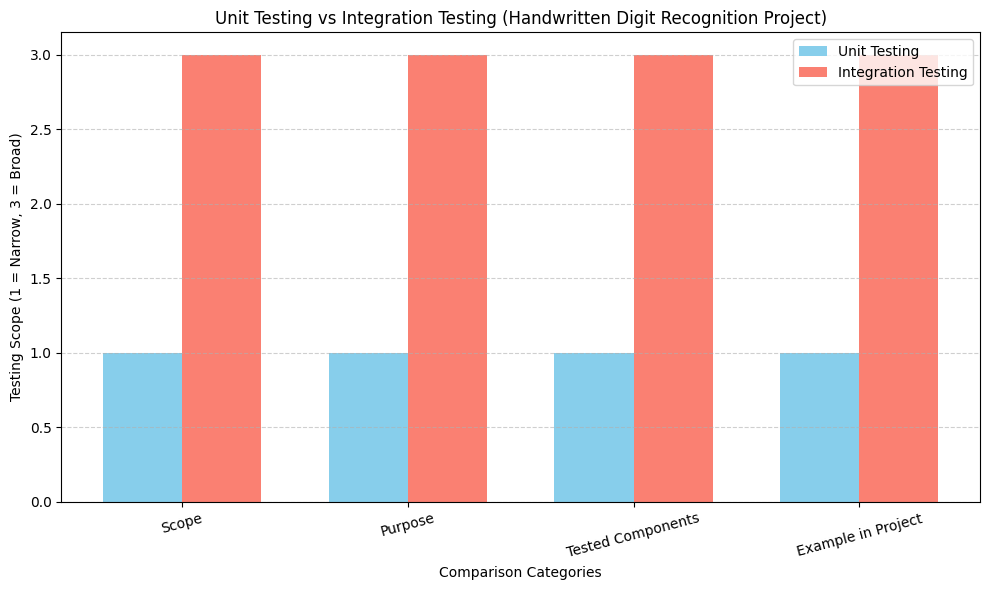

In [2]:
import matplotlib.pyplot as plt

# Data
categories = [
    "Scope",
    "Purpose",
    "Tested Components",
    "Example in Project"
]

unit_testing = [
    1,  # Narrow scope
    1,  # Tests individual functions
    1,  # Single function/module
    1   # e.g., preprocess_image() works correctly
]

integration_testing = [
    3,  # Broader scope
    3,  # Tests combined behavior
    3,  # Multiple modules working together
    3   # e.g., webcam → preprocess → predict → GUI works correctly
]

x = range(len(categories))

# Plotting
bar_width = 0.35
plt.figure(figsize=(10, 6))
plt.bar(x, unit_testing, width=bar_width, label="Unit Testing", color='skyblue')
plt.bar([i + bar_width for i in x], integration_testing, width=bar_width, label="Integration Testing", color='salmon')

# Labels and titles
plt.xlabel("Comparison Categories")
plt.ylabel("Testing Scope (1 = Narrow, 3 = Broad)")
plt.title("Unit Testing vs Integration Testing (Handwritten Digit Recognition Project)")
plt.xticks([i + bar_width/2 for i in x], categories, rotation=15)
plt.legend()

plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()